<a href="https://colab.research.google.com/github/AlexTorres10/PP2-RNA/blob/master/Parte01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Montando o google drive


In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Pesos iniciais: [0.27012569 0.25534538]
Época 1
[ 16.76839569 -61.06629462]
[ 89.56441569 -25.23673462]
[   6.03480569 -124.36256462]
[  55.22166569 -107.73383462]
[137.82036569 -27.87800462]
[  97.81145569 -105.77069462]
[147.27227569 -56.87664462]
[ 107.72302569 -153.97068462]
[199.96500569 -67.49811462]
[188.06789569 -95.39765462]
[ 159.86043569 -128.98177462]
[  95.57122569 -197.04640462]
[ 148.67554569 -161.26700462]
[ 213.66670569 -100.37532462]
[ 162.73312569 -163.77529462]
[249.86788569 -77.08546462]
[ 197.95255569 -133.28648462]
[ 133.06652569 -207.90257462]
[ 200.10417569 -157.73607462]
[ 122.64122569 -255.72378462]
[ 207.49210569 -194.45040462]
[ 140.81727569 -264.34573462]
[ 172.26766569 -239.91433462]
[ 235.16497569 -181.72737462]
[ 186.04784569 -233.57627462]
[ 277.96611569 -151.26116462]
[ 232.60672569 -231.40856462]
[ 184.34016569 -279.87828462]
[ 254.20379569 -215.65934462]
[ 198.36806569 -271.83687462]
[ 275.35553569 -206.98754462]
[ 239.08549569 -250.21558462]
[ 321.

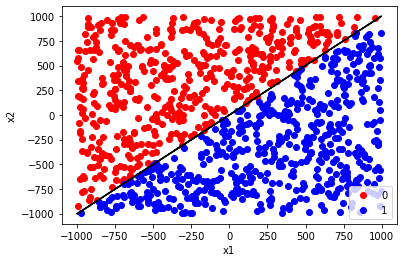

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

archiveAll = '/gdrive/My Drive/Colab Notebooks/PP2-RNA/dataAll.txt'
dataAll = np.fromfile(archiveAll)
lenAll = int(len(dataAll)/3)
dataAll = np.reshape(dataAll, (lenAll,3)) 

w = np.random.uniform(low=-0.5,high=0.5,size=2)
x = dataAll
err = np.repeat(1, len(x)) #
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err)):
    epoca += 1
    print("Época",epoca)
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            w = w + n*(yd-y)*xd
            print(w)
        else:
            err[i] = 0

df = pd.DataFrame(dataAll, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")
        
x_ = np.array(df['x1'])
y = x_ * (-w[0]/w[1])

plt.plot(x_, y,'black')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()